<a href="https://colab.research.google.com/github/Pierce-G7/IS_4487_Tokyo/blob/main/1_Pierce_day3_lab_retailer_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day 3 Lab, IS 4487

Outline

Repeat exercises from Lab 2, for practice, but with the *SuperStore Retail Orders* dataset

- Loading installed packages
- Inspect data
- Clean data
- Summarize data
- Explore plot types and search for insights

Please use the Gemini AI tool to get coding ideas.



# Notebook Instructions
- Remember to save a copy of the notebook in Drive so that you can save your changes.
- Complete the Assignment Tasks.
- When you are done revising this notebook save your changes to GitHub and upload the URL for the file to Canvas for the assignment.
- Some of these assignments ask you to do things we have not covered yet.  Use AI to come up with a solution.

# Load Libraries

➡️ Assignment Tasks
- Load Pandas

In [ ]:
# your code goes here

import pandas as pd
import matplotlib as mpl
import seaborn as sb
import sklearn as sk


# Load Data

In [ ]:
ss = pd.read_csv("https://raw.githubusercontent.com/jefftwebb/is_4487_base/main/Labs/DataSets/superstore_retail_orders.csv")

# Summarize and Review Data

➡️ Assignment Tasks

- Describe or profile the dataframe

In [ ]:
# Your code goes here
ss.describe()

,order_id,quantity,product_price
count,56045.000000,56006.000000,56045.000000
mean,61668.066340,3.348498,6195.540505
std,7508.229651,422.646565,35784.727716
min,45079.000000,1.000000,2.290000
25%,55644.000000,1.000000,7.950000
50%,61869.000000,1.000000,475.600000
75%,68097.000000,2.000000,914.620000
max,74147.000000,100000.000000,235481.000000


In [ ]:
ss.head()

,order_id,order_date,order_year_month,customer_name,city,state_province,quantity,product_name,product_line,product_price
0,51188,2021-07-01,2021-07,Audrey Blanco,North Cherylmouth,NEW HAMPSHIRE,3.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99
1,51187,2021-07-01,2021-07,Isaac Allen,Traceyland,WEST VIRGINIA,4.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99
2,51199,2021-07-02,2021-07,Ian Morgan,Dylanberg,SOUTH DAKOTA,5.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99
3,51241,2021-07-04,2021-07,Alexa Bell,Lake Tracytown,WISCONSIN,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99
4,51297,2021-07-08,2021-07,Casey Diaz,Byrdchester,MISSISSIPPI,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99


In [ ]:
ss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56045 entries, 0 to 56044
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          56045 non-null  int64  
 1   order_date        56013 non-null  object 
 2   order_year_month  56013 non-null  object 
 3   customer_name     56045 non-null  object 
 4   city              55571 non-null  object 
 5   state_province    55571 non-null  object 
 6   quantity          56006 non-null  float64
 7   product_name      56045 non-null  object 
 8   product_line      56045 non-null  object 
 9   product_price     56045 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 4.3+ MB


# Prepare Data

➡️ Assignment Tasks
- Remove rows with empty (NULL) values
- Locate outliers in any of the variables.   Filter them out if they appear to be mistakes; keep them if they are exceptional cases.
- Create a new field: total_purchase. This should be product_price x quantity.

In [ ]:
# Drop NAs
ss_cleaned = ss.dropna()

In [ ]:
# Search for and filter outliers
ss_clean = ss_cleaned[ss_cleaned['product_price'] < 20000]
ss_clean = ss_clean[ss_clean['quantity'] < 10000]

In [ ]:
# create total_purchase
ss_clean['total_purchase'] = ss_clean['product_price'] * ss_clean['quantity' ]

Check that your cleaning worked

In [ ]:
ss_clean['year'] = ss_clean['order_year_month'].str[:4]

In [ ]:
# your code goes here
ss_clean.describe()

,order_id,quantity,product_price,total_purchase
count,54173.000000,54173.000000,54173.000000,5.417300e+04
mean,61642.138224,1.553025,614.109579,7.973136e+02
std,7518.845903,9.284931,816.673965,1.412708e+04
min,45079.000000,1.000000,2.290000,2.290000e+00
25%,55623.000000,1.000000,7.950000,1.497000e+01
50%,61855.000000,1.000000,475.600000,4.756000e+02
75%,68063.000000,2.000000,914.620000,1.000440e+03
max,74147.000000,2000.000000,3578.270000,2.024994e+06


# Summarize Data

➡️ Assignment Tasks
- Calculate the average price per year-month
- Calculate the total revenue per year month

Does more cleaning need to be done? If so, do it and then recreate the above summary tables.

In [ ]:
# average price
ss_clean[['product_price','year']].groupby(['year']).mean()

,product_price
year,
1922,587.584737
2020,2423.881871
2021,562.332210
2022,491.378039
2029,470.980225
2421,490.580727


In [ ]:
# total revenue
ss_clean[['total_purchase']].sum()

total_purchase    43192870.53
dtype: float64

# Plot Data

➡️ Assignment Tasks
- Produce two plots that show patterns or relationships in the data.
- Interpret these patterns for potential value to the business.  

<Axes: ylabel='product_line'>

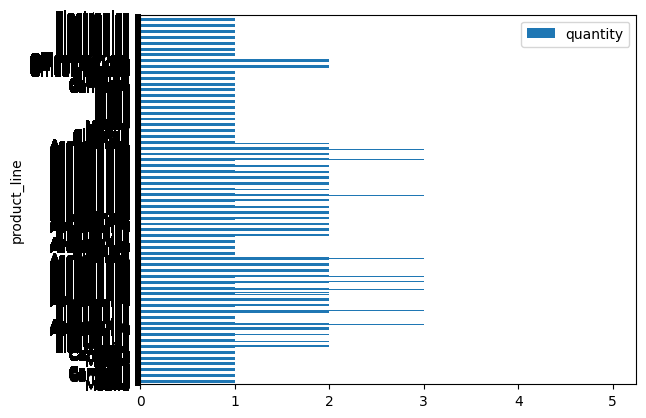

In [47]:
ss_clean['product_line'] = ss_clean['product_line'].astype('category')

ss_clean.plot(kind='barh',
              y='quantity',
              x='product_line',
              ylabel = "product quantity",
              title= "quantity and product line")

In [ ]:
# Your code goes here.  Plot 2
ss_clean[['product_line','total_purchase']].groupby(['product_line']).sum().plot(kind='bar', title = 'product and average orders', ylabel = 'average orders', color = 'green')

Make an interpretive comment.